In [26]:
%load_ext autoreload
%autoreload 2

In [102]:
import nltk
import inflect
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nlp_surveillance.classifier import extract_sentence
from nlp_surveillance.pipeline import ExtractSentencesAndLabel, RecommenderLabeling, RecommenderTierAnnotation
from nlp_surveillance.classifier import summarize
from utils.my_utils import split_list_and_distribute_to_new_rows

# Count/Date Classifier: Most Informative Words

In [45]:
df_sent = ExtractSentencesAndLabel('counts').data_output()
df_sent['sentence']= df_sent['sentence'].apply(lambda x: list(set(x.split()) - set(stopwords.words('english'))))
df_sent.head()

,sentence,label
0,"[preparedness, +234(0)708, us, 9700, control, ...",False
1,"[preparedness, +234(0)708, us, 9700, control, ...",False
2,"[preparedness, +234(0)708, us, 9700, control, ...",False
3,"[held, achieve, Goals, LeoneSustainable, Weste...",False
4,"[held, achieve, Goals, LeoneSustainable, Weste...",False


In [46]:
df_sent = split_list_and_distribute_to_new_rows(df_sent, 'sentence')
df_sent.head()

,label,sentence
0,False,preparedness
1,False,+234(0)708
2,False,us
3,False,9700
4,False,control


In [47]:
as_tuples = df_sent.apply(tuple, axis=1).tolist()
as_tuples = [({'word':word}, label) for label, word in as_tuples]
as_tuples

[({'word': 'preparedness'}, False),
 ({'word': '+234(0)708'}, False),
 ({'word': 'us'}, False),
 ({'word': '9700'}, False),
 ({'word': 'control'}, False),
 ({'word': '0010Whatsapp:'}, False),
 ({'word': '5577×Contact'}, False),
 ({'word': 'non-communicable'}, False),
 ({'word': 'year'}, False),
 ({'word': 'established'}, False),
 ({'word': 'Nigeria’s'}, False),
 ({'word': 'Nigeria'}, False),
 ({'word': 'Disease'}, False),
 ({'word': 'challenges'}, False),
 ({'word': '0839SMS'}, False),
 ({'word': 'detection'}, False),
 ({'word': 'epidemics'}, False),
 ({'word': 'diseases.Connect'}, False),
 ({'word': '(NCDC)'}, False),
 ({'word': 'Free'}, False),
 ({'word': '711'}, False),
 ({'word': 'health'}, False),
 ({'word': 'NCDCThe'}, False),
 ({'word': 'Subscribe'}, False),
 ({'word': 'Centre'}, False),
 ({'word': '2011'}, False),
 ({'word': 'enhance'}, False),
 ({'word': '0800'}, False),
 ({'word': 'Control'}, False),
 ({'word': '955'}, False),
 ({'word': 'Number:'}, False),
 ({'word': 'Newsle

In [48]:
clf = nltk.NaiveBayesClassifier.train(as_tuples)
clf.show_most_informative_features(20)

Most Informative Features
                    word = 'variant'        True : False  =     31.1 : 1.0
                    word = 'poultry'        True : False  =     27.1 : 1.0
                    word = 'Laibin'         True : False  =     22.2 : 1.0
                    word = '42-year-old'    True : False  =     22.2 : 1.0
                    word = 'strains.'       True : False  =     19.2 : 1.0
                    word = 'provinces.Aug'   True : False  =     19.2 : 1.0
                    word = '13For'          True : False  =     19.2 : 1.0
                    word = '(H1N2v)'        True : False  =     19.2 : 1.0
                    word = 'straight'       True : False  =     19.2 : 1.0
                    word = 'H1N2'           True : False  =     19.2 : 1.0
                    word = 'Ohio.The'       True : False  =     19.2 : 1.0
                    word = 'fair,'          True : False  =     19.2 : 1.0
                    word = 'Bulgaria,'      True : False  =     17.3 : 1.

In [49]:
df_sent_date = ExtractSentencesAndLabel('dates').data_output()
df_sent_date['sentence']= df_sent_date['sentence'].apply(lambda x: list(set(x.split()) - set(stopwords.words('english'))))
df_sent_date = split_list_and_distribute_to_new_rows(df_sent_date, 'sentence')
as_tuples_date = df_sent_date.apply(tuple, axis=1).tolist()
as_tuples_date = [({'sent':word}, label) for label, word in as_tuples_date]

In [50]:
clf_date = nltk.NaiveBayesClassifier.train(as_tuples_date)
clf_date.show_most_informative_features(20)

Most Informative Features
                    sent = 'worm'           True : False  =      6.0 : 1.0
                    sent = 'occurring'      True : False  =      5.3 : 1.0
                    sent = 'Northern'       True : False  =      5.3 : 1.0
                    sent = 'emerging'       True : False  =      5.3 : 1.0
                    sent = 'patients'      False : True   =      4.5 : 1.0
                    sent = 'South'          True : False  =      4.1 : 1.0
                    sent = 'deaths'        False : True   =      3.9 : 1.0
                    sent = 'launches'       True : False  =      3.8 : 1.0
                    sent = 'Syria'          True : False  =      3.8 : 1.0
                    sent = 'NDOH-WHO'       True : False  =      3.8 : 1.0
                    sent = 'admitted'       True : False  =      3.8 : 1.0
                    sent = 'deaths.'        True : False  =      3.8 : 1.0
                    sent = '22'             True : False  =      3.8 : 1.0

# Recommendation Classifier

In [51]:
df_recommand = RecommenderLabeling().data_output()

In [52]:
df_tiers = RecommenderTierAnnotation().data_output()

In [53]:
df_tiers.head()

,counts,date,diseases,geoname,label,text
0,"[357, 60]","[[2018-12-06 00:00:00, 2018-12-27 00:00:00], [...",Ebola hemorrhagic fever,Democratic Republic of the Congo,False,Ebola virus disease – Democratic Republic of t...
1,[1],"[[2018-10-31 00:00:00, 2018-12-01 00:00:00]]",None,Kingdom of Saudi Arabia,False,Middle East respiratory syndrome coronavirus (...
2,"[6, 1, 5]","[[2016-01-01 00:00:00, 2019-01-01 00:00:00]]",typhoid fever,Islamic Republic of Pakistan,False,Typhoid fever – Islamic Republic of PakistanDi...
3,[18],"[[2018-08-01 00:00:00, 2018-09-01 00:00:00]]",Ebola hemorrhagic fever,Democratic Republic of the Congo,False,Ebola virus disease – Democratic Republic of t...
4,"[1, 1]","[[2018-11-18 00:00:00, 2018-11-19 00:00:00]]",yellow fever,Gambia,False,Yellow Fever – Kingdom of the NetherlandsDisea...


In [54]:
df_clf = pd.concat([df_recommand, df_tiers],axis=1, ignore_index=False)

In [55]:
df_clf = df_clf.dropna()

In [56]:
df_clf['counts'] = df_clf['counts'].apply(lambda x: list(set(x)))

In [57]:
df_clf['counts'] = df_clf['counts'].apply(np.nanmean)

In [ ]:
engine = inflect.engine()
df_clf['counts'] = (df_clf['counts']
                    .apply(np.log10)
                    .apply(lambda x: max(x, 0))
                    .apply(lambda x: engine.number_to_words(int(x)))
                   )

In [ ]:
df_clf['features'] = df_clf[['geoname', 'diseases', 'counts']].values.tolist()

In [ ]:
df_clf.head()

# SpaCy CNN classifier

In [38]:
"""Train a convolutional neural network text classifier on the
IMDB dataset, using the TextCategorizer component. The dataset will be loaded
automatically via Thinc's built-in dataset loader. The model is added to
spacy.pipeline, and predictions are available via `doc.cats`. For more details,
see the documentation:
* Training: https://spacy.io/usage/training

Compatible with: spaCy v2.0.0+
"""
from __future__ import unicode_literals, print_function
import random
from pathlib import Path
import thinc.extra.datasets

import spacy
from spacy.util import minibatch, compounding




def main(model=None, output_dir=None, n_iter=20, n_texts=2000, init_tok2vec=None):

    output_dir = Path('spacy_output')
    if not output_dir.exists():
        output_dir.mkdir()


    nlp = spacy.blank("en")  # create blank Language class
    print("Created blank 'en' model")

    # add the text classifier to the pipeline if it doesn't exist
    # nlp.create_pipe works for built-ins that are registered with spaCy
    textcat = nlp.create_pipe(
        "textcat",
        config={
            "exclusive_classes": True,
            "architecture": "simple_cnn",
        }
    )
    nlp.add_pipe(textcat, last=True)
    # otherwise, get it, so we can add labels to it

    # add label to text classifier
    textcat.add_label("Relevant")
    textcat.add_label("Irrelevant")

    # load the IMDB dataset
    print("Loading data...")
    from sklearn.model_selection import train_test_split
    train_texts, dev_texts, train_cats, dev_cats = train_test_split(df_recommand['extracted_text'],
                                                                    df_recommand['label'],
                                                                    test_size=.2)
    
    train_cats = [{"Relevant": bool(y), "Irrelevant": not bool(y)} for y in train_cats]
    dev_cats = [{"Relevant": bool(y), "Irrelevant": not bool(y)} for y in dev_cats]
    print(
        "Using ({} training, {} evaluation)".format(
             len(train_texts), len(dev_texts)
        )
    )
    train_data = list(zip(train_texts, [{"cats": cats} for cats in train_cats]))

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "textcat"]
    with nlp.disable_pipes(*other_pipes):  # only train textcat
        optimizer = nlp.begin_training()
        if init_tok2vec is not None:
            with init_tok2vec.open("rb") as file_:
                textcat.model.tok2vec.from_bytes(file_.read())
        print("Training the model...")
        print("{:^5}\t{:^5}\t{:^5}\t{:^5}".format("LOSS", "P", "R", "F"))
        batch_sizes = compounding(4.0, 32.0, 1.001)
        for i in range(n_iter):
            losses = {}
            # batch up the examples using spaCy's minibatch
            random.shuffle(train_data)
            batches = minibatch(train_data, size=batch_sizes)
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(texts, annotations, sgd=optimizer, drop=0.2, losses=losses)
            with textcat.model.use_params(optimizer.averages):
                # evaluate on the dev data split off in load_data()
                scores = evaluate(nlp.tokenizer, textcat, dev_texts, dev_cats)
            print(
                "{0:.3f}\t{1:.3f}\t{2:.3f}\t{3:.3f}".format(  # print a simple table
                    losses["textcat"],
                    scores["textcat_p"],
                    scores["textcat_r"],
                    scores["textcat_f"],
                )
            )

    # test the trained model
    test_text = "This movie sucked"
    doc = nlp(test_text)
    print(test_text, doc.cats)

    if output_dir is not None:
        with nlp.use_params(optimizer.averages):
            nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

        # test the saved model
        print("Loading from", output_dir)
        nlp2 = spacy.load(output_dir)
        doc2 = nlp2(test_text)
        print(test_text, doc2.cats)


def load_data(limit=0, split=0.8):
    """Load data from the IMDB dataset."""
    # Partition off part of the train data for evaluation
    train_data, _ = thinc.extra.datasets.imdb()
    random.shuffle(train_data)
    train_data = train_data[-limit:]
    texts, labels = zip(*train_data)
    cats = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in labels]
    split = int(len(train_data) * split)
    return (texts[:split], cats[:split]), (texts[split:], cats[split:])


def evaluate(tokenizer, textcat, texts, cats):
    docs = (tokenizer(text) for text in texts)
    tp = 0.0  # True positives
    fp = 1e-8  # False positives
    fn = 1e-8  # False negatives
    tn = 0.0  # True negatives
    for i, doc in enumerate(textcat.pipe(docs)):
        gold = cats[i]
        for label, score in doc.cats.items():
            if label not in gold:
                continue
            if label == "NEGATIVE":
                continue
            if score >= 0.5 and gold[label] >= 0.5:
                tp += 1.0
            elif score >= 0.5 and gold[label] < 0.5:
                fp += 1.0
            elif score < 0.5 and gold[label] < 0.5:
                tn += 1
            elif score < 0.5 and gold[label] >= 0.5:
                fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    if (precision + recall) == 0:
        f_score = 0.0
    else:
        f_score = 2 * (precision * recall) / (precision + recall)
    return {"textcat_p": precision, "textcat_r": recall, "textcat_f": f_score}


In [39]:
main()

Created blank 'en' model
Loading data...
Using (2585 training, 647 evaluation)
Training the model...
LOSS 	  P  	  R  	  F  
51.276	0.949	0.949	0.949
30.055	0.949	0.949	0.949
19.813	0.949	0.949	0.949
14.090	0.950	0.947	0.949
10.931	0.949	0.947	0.948
9.297	0.949	0.947	0.948
7.855	0.949	0.949	0.949
6.298	0.950	0.946	0.948
4.783	0.949	0.946	0.947
3.346	0.949	0.944	0.947
2.780	0.947	0.944	0.946
2.375	0.947	0.943	0.945
2.255	0.947	0.941	0.944
2.060	0.947	0.940	0.943
2.084	0.945	0.938	0.942
1.964	0.947	0.938	0.943
1.817	0.947	0.938	0.943
1.781	0.947	0.938	0.943
1.721	0.948	0.938	0.943
1.718	0.950	0.938	0.944
This movie sucked {'Relevant': 0.03190074488520622, 'Irrelevant': 0.5072120428085327}
Saved model to spacy_output
Loading from spacy_output
This movie sucked {'Relevant': 0.026244087144732475, 'Irrelevant': 0.5144514441490173}


## Oversample

In [103]:
import sklearn
import sklearn.model_selection as ms
import sklearn.feature_extraction.text as text
import sklearn.naive_bayes as nb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
from imblearn.pipeline import Pipeline
pipe1 = Pipeline(TfidfVectorizer(),
                         ADASYN(),
                         MultinomialNB())
pipe2 = Pipeline(TfidfVectorizer(),
                         ADASYN(),
                         MultinomialNB())
pipe3 = Pipeline(TfidfVectorizer(),
                         MultinomialNB())

NameError: name 'TfidfVectorizer' is not defined

In [43]:

count = to_train_d['counts'].replace(-np.inf, 0.).apply(int).apply(lambda x: p.number_to_words(x))

NameError: name 'to_train_d' is not defined

In [44]:
to_train_d['features'] = to_train_d['features'].apply(lambda x: ' '.join(x))

NameError: name 'to_train_d' is not defined

In [42]:
(X_train, X_test, y_train, y_test) = \
    ms.train_test_split(df['annotated'], df['label'], test_size=.2)
y_balanced = compute_sample_weight(class_weight='balanced', y=y_train)

NameError: name 'df' is not defined

In [ ]:
# pipe1.fit(X_train, y_train)
# pipe2.fit(X_train, y_train)
pipe3.fit(X_train, y_train)

In [ ]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

In [104]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_pred, y_train))  #  TEXT WITHOUT STOPWORDS

In [ ]:
print(classification_report_imbalanced(y_test, y_pred))  #  TEXT WITHOUT STOPWORDS

In [ ]:
print(classification_report_imbalanced(y_test, y_pred))  #  TEXT WITHOUT STOPWORDS

In [ ]:
print(classification_report_imbalanced(y_test, y_pred))  # RAW TEXT

In [ ]:
print(classification_report_imbalanced(y_test, y_pred))  # COMBINED

In [ ]:
print(classification_report_imbalanced(y_test, y_pred))  # DISEASE

In [ ]:
print(classification_report_imbalanced(y_test, y_pred))  # GEONAME

In [ ]:
print(classification_report_imbalanced(y_test, y_pred))  # COUNT

In [ ]:
set(y_balanced)

In [ ]:
y_balanced = y_balanced/min(y_balanced)

In [ ]:
y_balanced = [int(np.ceil(i)) for i in y_balanced]

In [ ]:
y_test = [int(np.ceil(i)) for i in y_test]

In [ ]:
set(y_balanced)

In [ ]:
pipe.fit(X_train, y_balanced)
y_pred = pipe.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test, y_pred))  #  weighted

In [105]:
from sklearn.utils.class_weight import compute_sample_weight

In [ ]:
tf = text.TfidfVectorizer()
X = tf.fit_transform(to_train_d['geoname'])
y = to_train_d['label'].apply(int)
y_balanced = compute_sample_weight(class_weight='balanced', y=y)

In [ ]:
p = 100 * X.nnz / float(X.shape[0] * X.shape[1])
print(f"Each sample has ~{p:.2f}% non-zero features.")


In [ ]:
(X_train, X_test, y_train, y_test) = \
    ms.train_test_split(X, y, test_size=.2)

In [ ]:
bnb = ms.GridSearchCV(
    nb.BernoulliNB(),
    param_grid={'alpha': np.logspace(-2., 2., 50)})
bnb.fit(X_train, y_train)

In [ ]:
bnb.score(X_test, y_test)


In [ ]:
predicted = bnb.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

In [ ]:
# We first get the words corresponding to each feature
names = np.asarray(tf.get_feature_names())
# Next, we display the 50 words with the largest
# coefficients.
print(','.join(names[np.argsort(
    bnb.best_estimator_.coef_[0, :])[::-1][:50]]))

# Embeddings

In [106]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, ADASYN
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.base import TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [115]:
class MeanEmbeddingTransformer(TransformerMixin):
    
    def __init__(self):
        self._vocab, self._E = self._load_words()
        
    
    def _load_words(self):
        E = {}
        vocab = []

        with open('nlp_surveillance/glove.6B.50d.txt', 'r', encoding="utf8") as file:
            for i, line in enumerate(file):
                l = line.split(' ')
                if l[0].isalpha():
                    v = [float(i) for i in l[1:]]
                    E[l[0]] = np.array(v)
                    vocab.append(l[0])
        return np.array(vocab), E            

    
    def _get_word(self, v):
        for i, emb in enumerate(self._E):
            if np.array_equal(emb, v):
                return self._vocab[i]
        return None
    
    def _doc_mean(self, doc):
        return np.mean(np.array([self._E[w.lower().strip()] for w in doc if w.lower().strip() in self._E]), axis=0)
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.array([self._doc_mean(doc) for doc in X])
    
    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

In [116]:
def plot_roc(clf, X_test, y_test):
    y_pred = clf.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred[:,1])
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
def print_scores(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)
#     print(classification.accuracy_score(y_test, y_pred.round(), normalize=False))
#     print(confusion_matrix(y_pred,y_test))
#     print('F1 score: {:3f}'.format(f1_score(y_test, y_pred.round())))
#     print('AUC score: {:3f}'.format(roc_auc_score(y_test, y_pred)))

In [117]:
import pandas as pd
df = pd.read_csv('data/recommender/with_label.csv')

In [118]:
df.memory_usage(deep=True).sum()

16167717

In [119]:
df['label'].value_counts()

False    3077
True      155
Name: label, dtype: int64

In [120]:
X = df['extracted_text'].values
y = df['label'].values

In [121]:
def tokenize_and_transform(X, sample_size):
    essays1 = X
    tok_es1 = [word_tokenize(doc) for doc in essays1[:sample_size]]
    met = MeanEmbeddingTransformer()
    X_transform = met.fit_transform(tok_es1)
    return X_transform

In [122]:
X_transform = tokenize_and_transform(X, 3200)

FileNotFoundError: [Errno 2] No such file or directory: 'nlp_surveillance/glove.6B.50d.txt'

In [ ]:
np.savetxt('X_embed.csv', X_transform, delimiter=',')

In [ ]:
X_transform = np.loadtxt('X_embed.csv', delimiter=',')

In [ ]:
np.shape(X_transform)

In [72]:
np.shape(X_transform)

(3200, 50)

In [73]:
np.shape(y)

(3232,)

In [74]:
# X_train, X_test, y_train, y_test = train_test_split(X_resample,
#                                                     y_resample, stratify=y_resample, random_state=0)



In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_transform,
                                                    y[:3200], random_state=0)
ada = ADASYN(random_state=0)
X_resample, y_resample = ada.fit_sample(X_train, y_train)


In [76]:
rus = RandomOverSampler(random_state=0)
X_resample, y_resample = rus.fit_sample(X_transform, y[:X_transform.shape[0]])

/home/auss/miniconda3/envs/rki/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


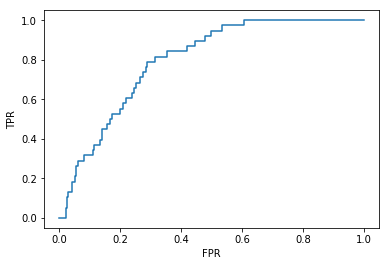

In [77]:
lr = LogisticRegression()
print_scores(lr, X_resample, y_resample, X_test, y_test)
plot_roc(lr, X_test, y_test)

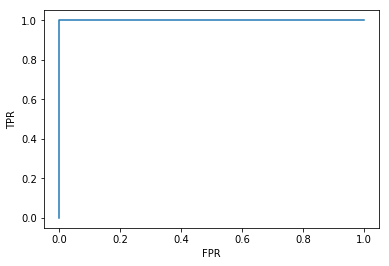

In [79]:
knn = KNeighborsClassifier()
print_scores(knn, X_resample, y_resample, X_test, y_test)
plot_roc(knn, X_test, y_test)

/home/auss/miniconda3/envs/rki/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


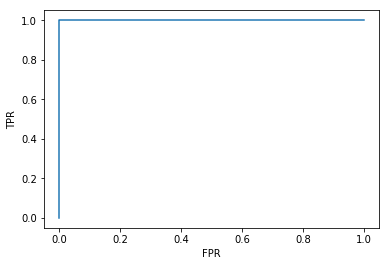

In [80]:
rf = RandomForestClassifier().fit(X_resample, y_resample)
print_scores(rf, X_resample, y_resample, X_test, y_test)
plot_roc(rf, X_test, y_test)

In [81]:
svc = SVC().fit(X_resample, y_resample)
print_scores(svc, X_resample, y_resample, X_test, y_test)
plot_roc(svc, X_test, y_test)

/home/auss/miniconda3/envs/rki/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/auss/miniconda3/envs/rki/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AttributeError: predict_proba is not available when  probability=False

In [82]:
svc = LinearSVC().fit(X_resample, y_resample)
print_scores(svc, X_resample, y_resample, X_test, y_test)
plot_roc(svc, X_test, y_test)

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

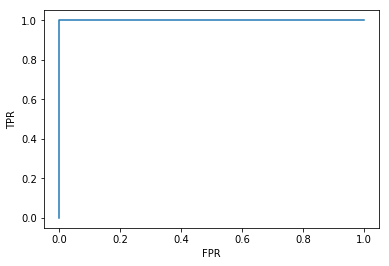

In [83]:
dtc = DecisionTreeClassifier().fit(X_resample, y_resample)
y_pred = dtc.predict(X_test)
print_scores(dtc, X_resample, y_resample, X_test, y_test)
plot_roc(dtc, X_test, y_test)

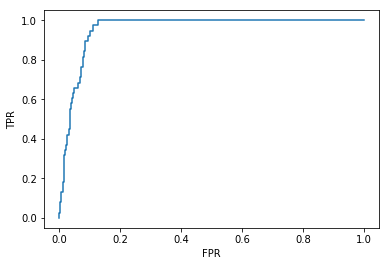

In [84]:
mlp = MLPClassifier(max_iter=2000, early_stopping=True).fit(X_resample, y_resample)
print_scores(mlp, X_resample, y_resample, X_test, y_test)
plot_roc(mlp, X_test, y_test)

In [85]:
from sklearn.neural_network import MLPRegressor
mlp_r = MLPRegressor(max_iter=2000, early_stopping=True).fit(X_resample, y_resample)
print_scores(mlp_r, X_resample, y_resample, X_test, y_test)
plot_roc(mlp_r, X_test, y_test)

AttributeError: 'MLPRegressor' object has no attribute 'predict_proba'

In [ ]:
import pickle
with open('mlp_clf.pkl', 'wb') as f:
    pickle.dump(mlp, f)

In [ ]:
gs = GridSearchCV(LogisticRegression(), 
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1]}, scoring="roc_auc", cv=4)
gs = gs.fit(X_resample, y_resample)
print(gs.best_params_)
print('best score: {:3f}'.format(gs.best_score_))
plot_roc(gs, X_resample, y_resample)

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
gs = GridSearchCV(LinearSVC(), 
             param_grid=param_grid, scoring="roc_auc", cv=4)
gs = gs.fit(X_resample, y_resample)
print(gs.best_params_)
print('best score: {:3f}'.format(gs.best_score_))
plot_roc(gs, X_resample, y_resample)

In [ ]:
param_grid = {'activation': ['relu', 'logistic', 'tanh'],
              'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'invscaling', 'adaptive'], 'tol': [0.01]}
gs = GridSearchCV(MLPClassifier(), 
             param_grid=param_grid, scoring="roc_auc", cv=4)
gs = gs.fit(X_transform, y[:3200])
print(gs.best_params_)
print('best score: {:3f}'.format(gs.best_score_))
plot_roc(gs, X_resample, y_resample)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X_transform_cluster = KMeans(n_clusters=5).fit_transform(X_transform, y[:3200])

In [ ]:
rus = RandomUnderSampler(random_state=0)
X_resample_cluster, y_resample_cluster = rus.fit_sample(X_transform_cluster, y[:X_transform_cluster.shape[0]])

In [ ]:
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_resample_cluster,
                                                    y_resample_cluster, stratify=y_resample_cluster, random_state=0)

In [ ]:
lr = LogisticRegression()
print_scores(lr, X_train_cluster, y_train_cluster, X_test_cluster, y_test_cluster)
plot_roc(lr, X_test_cluster, y_test_cluster)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_transform_pca = PCA().fit_transform(X_transform, y[:3200])

In [ ]:
rus = RandomUnderSampler(random_state=0)
X_resample_pca, y_resample_pca = rus.fit_sample(X_transform_pca, y[:X_transform_pca.shape[0]])

In [ ]:
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(X_resample_cluster,
                                                    y_resample_cluster, stratify=y_resample_cluster, random_state=0)

In [ ]:
lr = LogisticRegression()
print_scores(lr, X_train_cluster, y_train_cluster, X_test_cluster, y_test_cluster)
plot_roc(lr, X_test_cluster, y_test_cluster)

# t-SNE

In [6]:
np.shape(X)

(3232,)

In [7]:
np.shape(y)

(3232,)

In [4]:
from nltk.tokenize import sent_tokenize

In [5]:
from flair.embeddings import WordEmbeddings
from flair.data import Sentence

# init embedding
glove_embedding = WordEmbeddings('en-news')

sentences = [Sentence(sentence) for sentence in sent_tokenize(' '.join(X))]

# embed a sentence using glove.
for sentence in sentences:
    glove_embedding.embed(sentence)

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.
2019-04-16 09:22:19,508 this function is deprecated, use smart_open.open instead


In [6]:
words = []
for sentence in sentences:
    for token in sentence:
        words.append(token.text)

In [7]:
embeddings = []
for sentence in sentences:
    for token in sentence:
        embeddings.append(token.embedding)

In [8]:
as_numoy = [t.numpy() for t in embeddings]

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import time

In [19]:
n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(as_numoy[::1000])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2250 samples in 0.035s...
[t-SNE] Computed neighbors for 2250 samples in 2.965s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2250
[t-SNE] Computed conditional probabilities for sample 2000 / 2250
[t-SNE] Computed conditional probabilities for sample 2250 / 2250
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.326614
[t-SNE] KL divergence after 300 iterations: 1.179062


In [49]:
word_2_vec = dict(zip(words, as_numoy))

In [53]:
to_pop = []
for k, v in word_2_vec.items():
    if sum(v) == 0:
        to_pop.append(k)
for k in to_pop:
    if k in word_2_vec:
        del word_2_vec[k]

In [60]:
to_pop = []
for k, v in word_2_vec.items():
    if len(k) > 12:
        to_pop.append(k)
for k in to_pop:
    if k in word_2_vec:
        del word_2_vec[k]

In [73]:
to_pop = []
for k, v in word_2_vec.items():
    if not all(c.isalnum() for c in k):
        to_pop.append(k)
for k in to_pop:
    if k in word_2_vec:
        del word_2_vec[k]

In [74]:
words = [i for i, _ in word_2_vec.items()]
as_embedding = [i for _, i in word_2_vec.items()]

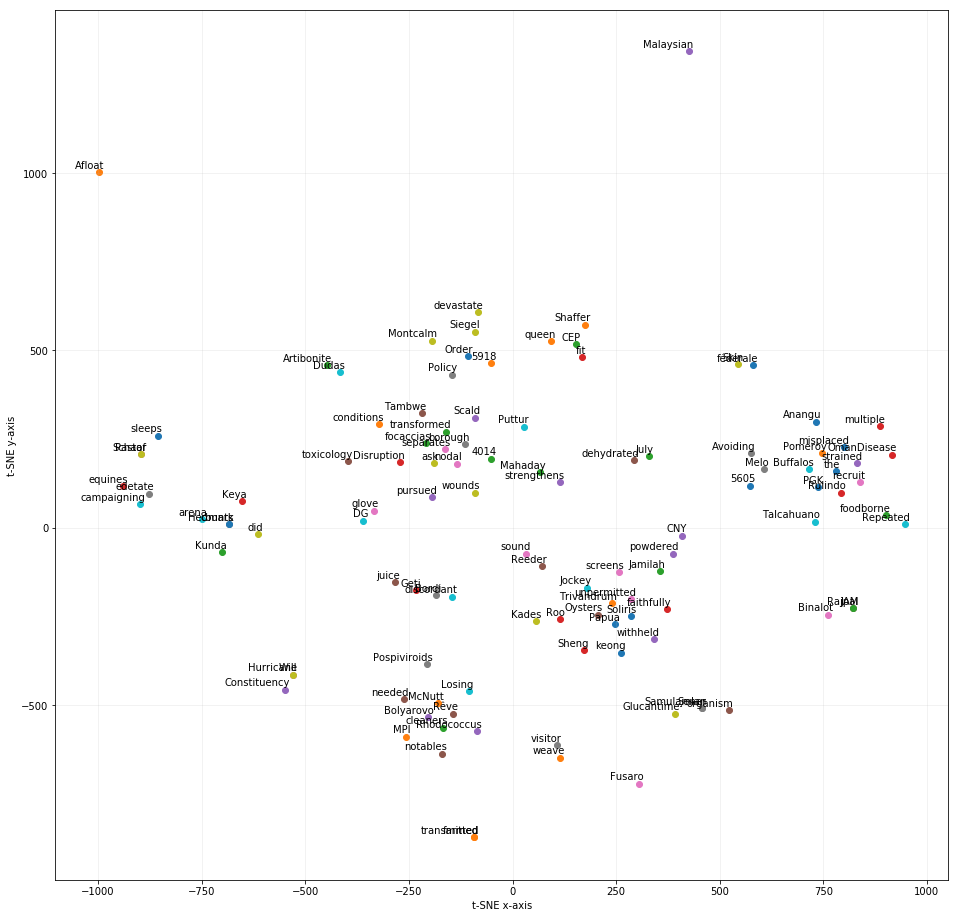

In [101]:
"Creates and TSNE model and plots it"
labels = words[6::300]
tokens = as_embedding[6::300]

# for word in model.wv.vocab:
#     tokens.append(model[word])
#     labels.append(word)

tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.xlabel("t-SNE x-axis")
plt.ylabel("t-SNE y-axis")
plt.grid(alpha=0.2)
plt.savefig("t-sna.pdf",format='pdf')
plt.show()

In [32]:
import pandas as pd
df_tsne = pd.DataFrame(tsne_results, columns=['x', 'y'])
df_tsne['labels'] = words[::1000]

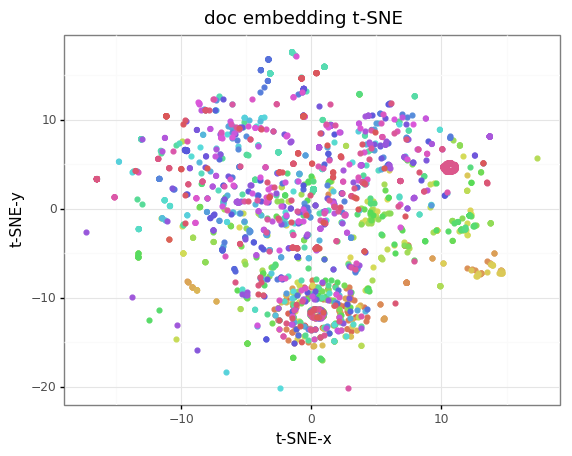

<ggplot: (-9223372036178174853)>

In [43]:
from plotnine import *
theme_set(theme_bw())
(ggplot(df_tsne, aes(x='x', y='y', color='labels' )) 
 + geom_point(show_legend = False)
 + xlab("t-SNE-x") + ylab("t-SNE-y") + ggtitle("word embedding t-SNE")
)

In [1]:
from web_app.app import summarize

In [ ]:
summarize('https://www.who.int/csr/don/04-march-2019-mers-oman/en/')